✅ Columns found: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

 Accuracy: 0.7630989699955217

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233


 Simple Confusion Matrix:
True Negatives : 915
False Positives: 251
False Negatives: 278
True Positives : 789


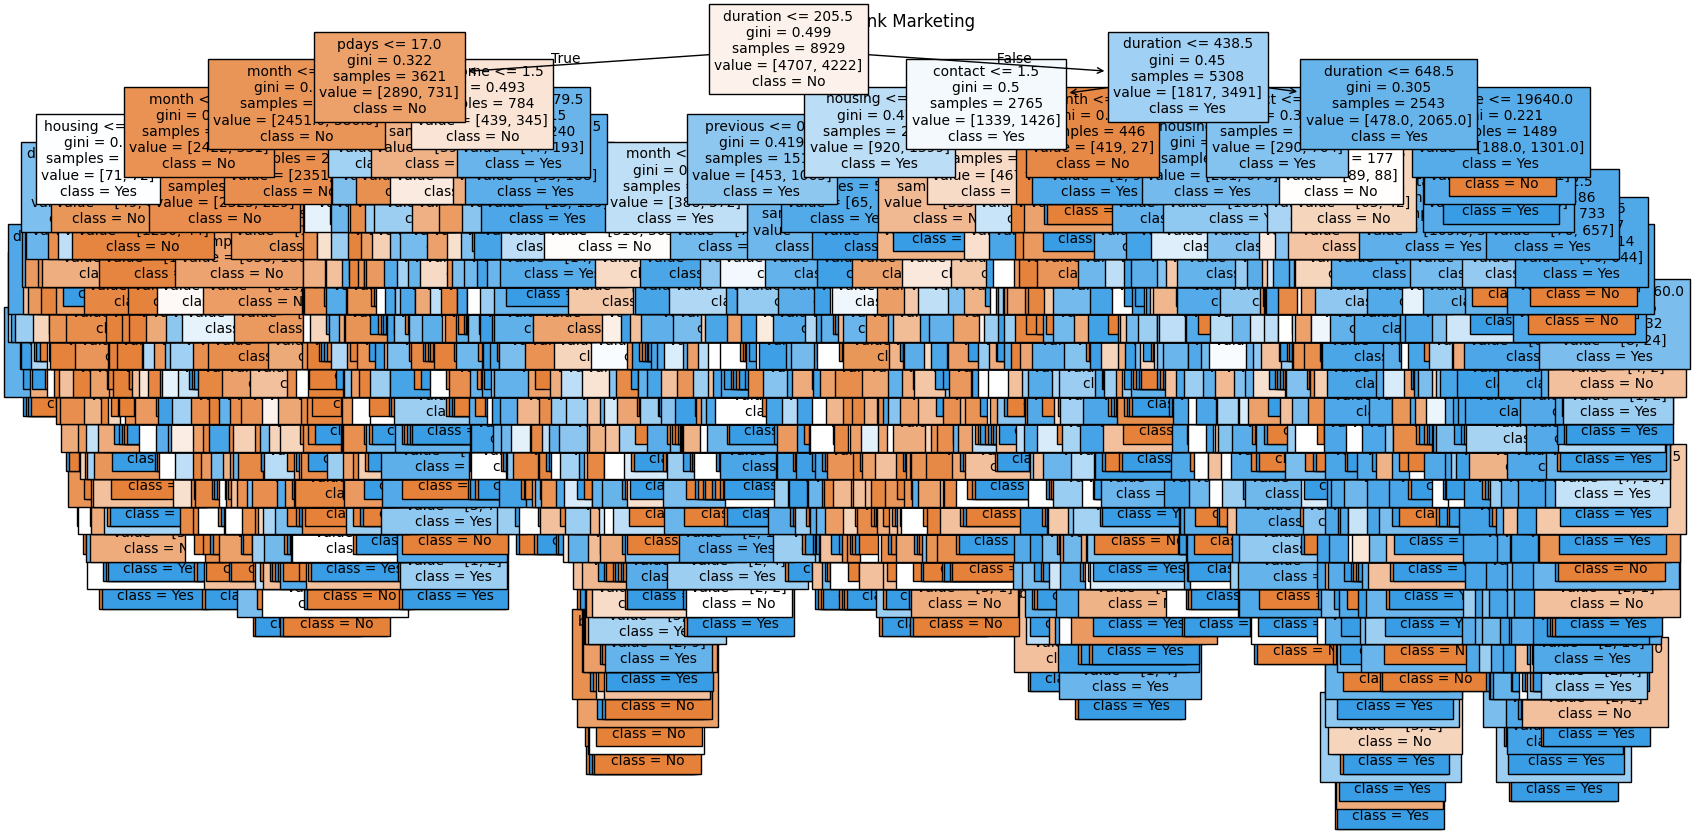

In [2]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Step 2: Load the CSV (auto-detect comma separator)
data = pd.read_csv('bank.csv')  # Make sure the filename matches your upload

# Step 3: Check and confirm column names
print("✅ Columns found:", data.columns.tolist())

# Step 4: Use 'deposit' as target column (used in Kaggle version)
target_col = 'deposit'
if target_col not in data.columns:
    raise ValueError("Target column 'deposit' not found.")

# Step 5: Label encode categorical columns
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Step 6: Split features (X) and label (y)
X = data.drop(target_col, axis=1)
y = data[target_col]

# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = clf.predict(X_test)

# Step 10: Evaluate model
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Display simple confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Simple Confusion Matrix:")
print(f"True Negatives : {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives : {cm[1][1]}")

# Step 12: Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.title("Decision Tree - Bank Marketing")
plt.show()
